# Pymaceuticals Inc.
---

### Analysis

- There were a total number of 249 original mice.
- Stelasyn had the lowest total of Timepoints. 
- There were more male mice than female mice.
 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
# Checking the number of mice.
len(merged_results["Mouse ID"])

1893

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_results[merged_results.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate


array(['g989'], dtype=object)

In [50]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_results[merged_results["Mouse ID"].isin(duplicate)]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_results.drop_duplicates(subset=["Mouse ID"])
clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [52]:
# Checking the number of mice in the clean DataFrame.
len(clean_data)

249

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.
grouped_data = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mean = grouped_data.mean()
median = grouped_data.median()
variance = grouped_data.var()
std_deviation = grouped_data.std()
sem = grouped_data.sem()

summary_stats = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": std_deviation,
    "SEM": sem
})

print(summary_stats)

              Mean  Median  Variance  Standard Deviation  SEM
Drug Regimen                                                 
Capomulin     45.0    45.0       0.0                 0.0  0.0
Ceftamin      45.0    45.0       0.0                 0.0  0.0
Infubinol     45.0    45.0       0.0                 0.0  0.0
Ketapril      45.0    45.0       0.0                 0.0  0.0
Naftisol      45.0    45.0       0.0                 0.0  0.0
Placebo       45.0    45.0       0.0                 0.0  0.0
Propriva      45.0    45.0       0.0                 0.0  0.0
Ramicane      45.0    45.0       0.0                 0.0  0.0
Stelasyn      45.0    45.0       0.0                 0.0  0.0
Zoniferol     45.0    45.0       0.0                 0.0  0.0


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    "mean", "median", "var", "std", "sem"
]).rename(columns={
    "mean": "Mean",
    "median": "Median",
    "var": "Variance",
    "std": "Standard Deviation",
    "sem": "SEM"
})

print(summary_stats)

              Mean  Median  Variance  Standard Deviation  SEM
Drug Regimen                                                 
Capomulin     45.0    45.0       0.0                 0.0  0.0
Ceftamin      45.0    45.0       0.0                 0.0  0.0
Infubinol     45.0    45.0       0.0                 0.0  0.0
Ketapril      45.0    45.0       0.0                 0.0  0.0
Naftisol      45.0    45.0       0.0                 0.0  0.0
Placebo       45.0    45.0       0.0                 0.0  0.0
Propriva      45.0    45.0       0.0                 0.0  0.0
Ramicane      45.0    45.0       0.0                 0.0  0.0
Stelasyn      45.0    45.0       0.0                 0.0  0.0
Zoniferol     45.0    45.0       0.0                 0.0  0.0


## Bar and Pie Charts

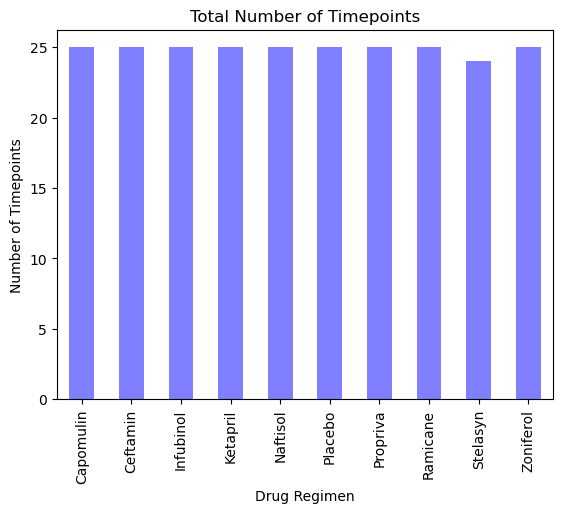

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_by_regimen = clean_data.groupby("Drug Regimen")["Timepoint"].count()
timepoints_by_regimen.plot(kind="bar", color="blue", alpha=0.5)
plt.title("Total Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

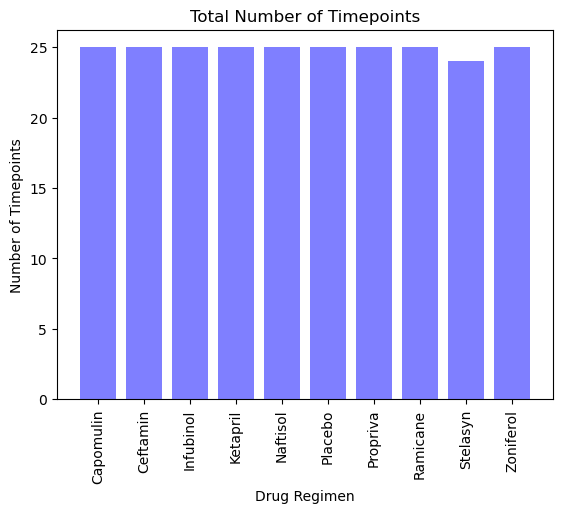

In [63]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_by_regimen = clean_data.groupby("Drug Regimen")["Timepoint"].count()
plt.bar(timepoints_by_regimen.index, timepoints_by_regimen.values, color='blue', alpha=0.5)
plt.title("Total Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()

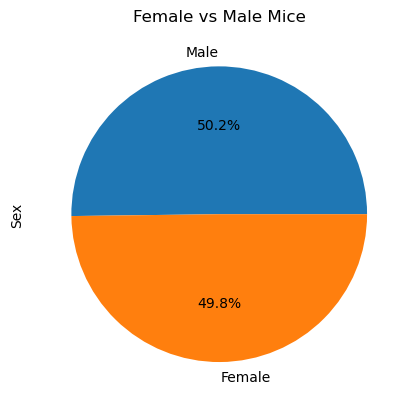

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data["Sex"].value_counts()
gender_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Female vs Male Mice")
plt.show()

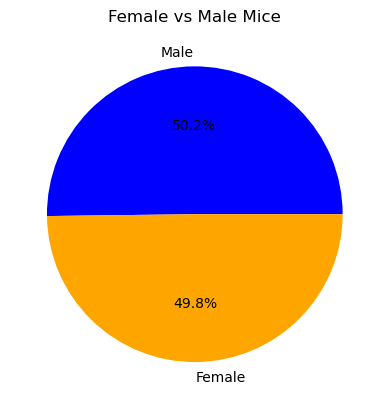

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data["Sex"].value_counts()
colors = ["blue", "orange"]
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct="%1.1f%%")
plt.title("Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regimen_subset = clean_data.loc[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoints = regimen_subset.groupby("Mouse ID")["Timepoint"].max()
final_timepoints

Mouse ID
a203    0
a251    0
a275    0
a411    0
a444    0
       ..
y769    0
y793    0
y865    0
z578    0
z581    0
Name: Timepoint, Length: 100, dtype: int64

In [75]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Fill the list with tumor volume data
for treatment in treatments:
    treatment_data = clean_data.loc[clean_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Append the treatment data to the list
    tumor_vol_data.append(treatment_data)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    for mouse in mouse_ids:
        mouse_data = treatment_data.loc[treatment_data["Mouse ID"] == mouse, :]
        tumor_volume = mouse_data.iloc[-1]["Tumor Volume (mm3)"]
        tumor_volumes[treatment].append(tumor_volume)
   
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    if len(outliers) > 0:
        print(f"Potential outliers for {treatment}:")
        print(outliers)
    else:
        print(f"No potential outliers for {treatment}")

NameError: name 'mouse_ids' is not defined

In [77]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data = []


for treatment in treatments:
    
    tumor_volume_data.append(clean_data[treatment])


fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data)


ax.set_title("Tumor Volume by Treatment Group")
ax.set_xlabel("Treatment")
ax.set_ylabel("Tumor Volume (mm3)")


ax.set_xticklabels(treatments_of_interest)


plt.show()


KeyError: 'Capomulin'

## Line and Scatter Plots

In [79]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = "s185"
treatment = "Capomulin"


selected_mouse = clean_data.loc[clean_data["Mouse ID"] == mouse_id]
selected_treatment = study_results.loc[study_results["Drug Regimen"] == treatment]
selected_data = pd.merge(selected_mouse, selected_treatment, on="Mouse ID")

fig, ax = plt.subplots()
ax.plot(selected_data["Timepoint"], selected_data["Tumor Volume (mm3)"])

ax.set_title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} ({treatment} Treatment)")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")

plt.show()


KeyError: 'Drug Regimen'

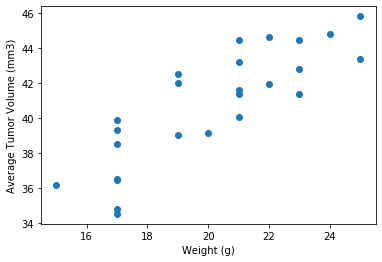

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


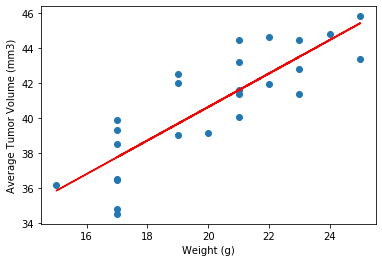

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

